<a href="https://colab.research.google.com/github/Elieser1945/DeepLearning/blob/main/Tugas_Week_1_Regresion_Infrared_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Elieser Pasaribu - 1103223209

# Tugas Week 1 - Deep Learning

# 📌  Model PyTorch Berdasarkan Dataset Infrared.csv

# Instalasi PyTorch

In [1]:
!pip install torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 46.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 31.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 31.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 42.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

# Import Library

In [8]:
# Import necessary libraries
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler # Import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score


# Load Dataset

In [9]:
import pandas as pd # Import the pandas library and assign it the alias 'pd'

# Load data
df = pd.read_csv("Infrared.csv")

# Drop kolom kategori jika ada
df = df.drop(columns=["Gender", "Ethnicity", "Age"], errors='ignore')

# Hapus baris dengan NaN
df = df.dropna()

# Pisahkan fitur (X) dan target (y)
X = df.drop(columns=["aveOralM"], errors='ignore').values
y = df["aveOralM"].values.reshape(-1, 1)
df.head(5)

,T_atm,Humidity,Distance,T_offset1,Max1R13_1,Max1L13_1,aveAllR13_1,aveAllL13_1,T_RC1,T_RC_Dry1,...,T_FHRC1,T_FHLC1,T_FHBC1,T_FHTC1,T_FH_Max1,T_FHC_Max1,T_Max1,T_OR1,T_OR_Max1,aveOralM
0,24.0,28.0,0.8,0.7025,35.0300,35.3775,34.4000,34.9175,34.9850,34.9850,...,33.4775,33.3725,33.4925,33.0025,34.5300,34.0075,35.6925,35.6350,35.6525,36.59
1,24.0,26.0,0.8,0.7800,34.5500,34.5200,33.9300,34.2250,34.7100,34.6325,...,34.0550,33.6775,33.9700,34.0025,34.6825,34.6600,35.1750,35.0925,35.1075,37.19
2,24.0,26.0,0.8,0.8625,35.6525,35.5175,34.2775,34.8000,35.6850,35.6675,...,34.8275,34.6475,34.8200,34.6700,35.3450,35.2225,35.9125,35.8600,35.8850,37.34
3,24.0,27.0,0.8,0.9300,35.2225,35.6125,34.3850,35.2475,35.2075,35.2000,...,34.4225,34.6550,34.3025,34.9175,35.6025,35.3150,35.7200,34.9650,34.9825,37.09
4,24.0,27.0,0.8,0.8950,35.5450,35.6650,34.9100,35.3675,35.6025,35.4750,...,35.1600,34.3975,34.6700,33.8275,35.4175,35.3725,35.8950,35.5875,35.6175,37.04


# Scaling Input & Output

In [11]:
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)
scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Training Model yang Sudah Dibuat

In [12]:
class NeuralNetwork(nn.Module):
    def __init__(self, input_dim):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)  # First hidden layer
        self.fc2 = nn.Linear(128, 64)         # Second hidden layer
        self.fc3 = nn.Linear(64, 32)          # Third hidden layer
        self.fc4 = nn.Linear(32, 1)           # Output layer
        self.relu = nn.ReLU()                 # ReLU activation
        self.dropout = nn.Dropout(0.2)        # Optional dropout

    def forward(self, x):
        x = self.relu(self.fc1(x))  # Apply ReLU after first layer
        x = self.dropout(x)         # Apply dropout (optional)
        x = self.relu(self.fc2(x))  # Apply ReLU after second layer
        x = self.dropout(x)         # Apply dropout (optional)
        x = self.relu(self.fc3(x))  # Apply ReLU after third layer
        x = self.fc4(x)             # No activation in output layer (regression)
        return x

# Inisialisasi model
input_dim = X_train.shape[1]
model = NeuralNetwork(input_dim)

# Loss function dan optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)

# Konversi data ke tensor
X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.FloatTensor(y_train).view(-1, 1)
X_test_tensor = torch.FloatTensor(X_test)
y_test_tensor = torch.FloatTensor(y_test).view(-1, 1)

# Training Loop
num_epochs = 200
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    # Backward pass dan optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print loss setiap 10 epoch
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [10/200], Loss: 0.5674
Epoch [20/200], Loss: 0.3908
Epoch [30/200], Loss: 0.3043
Epoch [40/200], Loss: 0.2722
Epoch [50/200], Loss: 0.2622
Epoch [60/200], Loss: 0.2372
Epoch [70/200], Loss: 0.2275
Epoch [80/200], Loss: 0.2302
Epoch [90/200], Loss: 0.2252
Epoch [100/200], Loss: 0.2164
Epoch [110/200], Loss: 0.2165
Epoch [120/200], Loss: 0.2161
Epoch [130/200], Loss: 0.2005
Epoch [140/200], Loss: 0.2086
Epoch [150/200], Loss: 0.1953
Epoch [160/200], Loss: 0.1905
Epoch [170/200], Loss: 0.1901
Epoch [180/200], Loss: 0.1885
Epoch [190/200], Loss: 0.1869
Epoch [200/200], Loss: 0.1897


# Evaluasi Model

In [13]:
model.eval()  # Set model ke mode evaluasi
with torch.no_grad():
    y_pred_torch = model(X_test_tensor)  # Prediksi dari model

# Konversi ke numpy array untuk perhitungan metrik
y_pred_numpy = y_pred_torch.numpy()
y_test_numpy = y_test_tensor.numpy()

# Hitung metrik evaluasi
mse = mean_squared_error(y_test_numpy, y_pred_numpy)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_numpy, y_pred_numpy)

# Print hasil evaluasi
print(f"Evaluation Results:")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R^2 Score: {r2:.4f}")

Evaluation Results:
MSE: 0.2305
RMSE: 0.4801
R^2 Score: 0.6992


# Visualisai Hasil

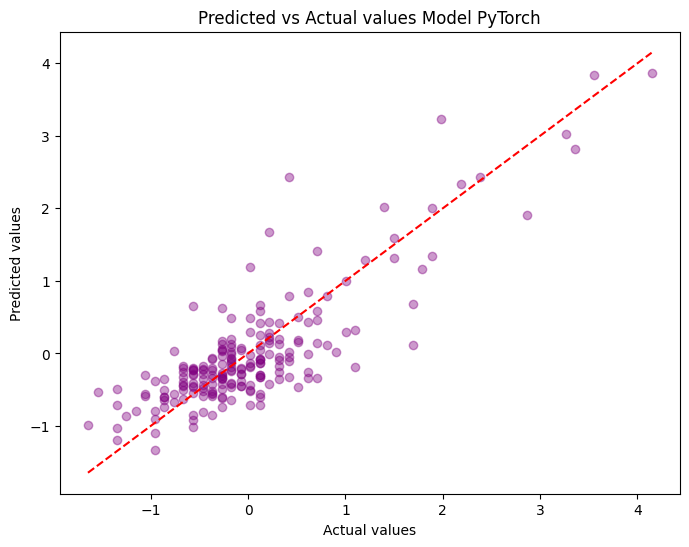

In [21]:

import matplotlib.pyplot as plt

y_test_np = y_test_numpy.flatten()
y_pred_test_np = y_pred_numpy.flatten()


plt.figure(figsize=(8, 6))
plt.scatter(y_test_np, y_pred_test_np, color='purple', alpha=0.4)
plt.plot([y_test_np.min(), y_test_np.max()], [y_test_np.min(), y_test_np.max()], color='red', linestyle='--')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Predicted vs Actual values Model PyTorch')
plt.show()


# 📌 Model TensorFlow Berdasarkan Dataset Infrared.csv

# Instalasi Tensorflow

In [16]:
!pip install tensorflow

# Import Library

In [17]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# Training Model

In [18]:
# Bangun model dengan TensorFlow (Keras)
model = keras.Sequential([
    layers.Dense(128, activation="relu", input_shape=(X_train.shape[1],)),  # Input layer + Hidden layer 1
    layers.Dense(64, activation="relu"),  # Hidden layer 2
    layers.Dense(32, activation="relu"),  # Hidden layer 3
    layers.Dense(1)  # Output layer (tanpa aktivasi untuk regresi)
])

# Compile model
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), loss="mse")

# Training model
num_epochs = 200
history = model.fit(X_train, y_train, epochs=num_epochs, batch_size=32, validation_data=(X_test, y_test), verbose=1)


Epoch 1/200


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 1.1355 - val_loss: 0.4538
Epoch 2/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5673 - val_loss: 0.3610
Epoch 3/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4710 - val_loss: 0.3117
Epoch 4/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4132 - val_loss: 0.2947
Epoch 5/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3264 - val_loss: 0.2835
Epoch 6/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3173 - val_loss: 0.2781
Epoch 7/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2652 - val_loss: 0.2693
Epoch 8/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2705 - val_loss: 0.2671
Epoch 9/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2525 - val_loss: 0.2685
Epoch 10/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2315 - val_loss: 0.2636
Epoch 11/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2205 - val_loss: 0.2623
Epoch 12/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2149 - val_l

# Evaluasi Model yang Sudah Dibuat

In [20]:
y_pred_tf = model.predict(X_test)
mse_tf = mean_squared_error(y_test, y_pred_tf)
rmse_tf = np.sqrt(mse_tf)
r2_tf = r2_score(y_test, y_pred_tf)

print(f'TensorFlow  \nMSE: {mse_tf:.4f}\nRMSE: {rmse_tf:.4f}\nR²: {r2_tf:.4f}')

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
TensorFlow  
MSE: 0.2953
RMSE: 0.5434
R²: 0.6147


# Visualisai Hasil

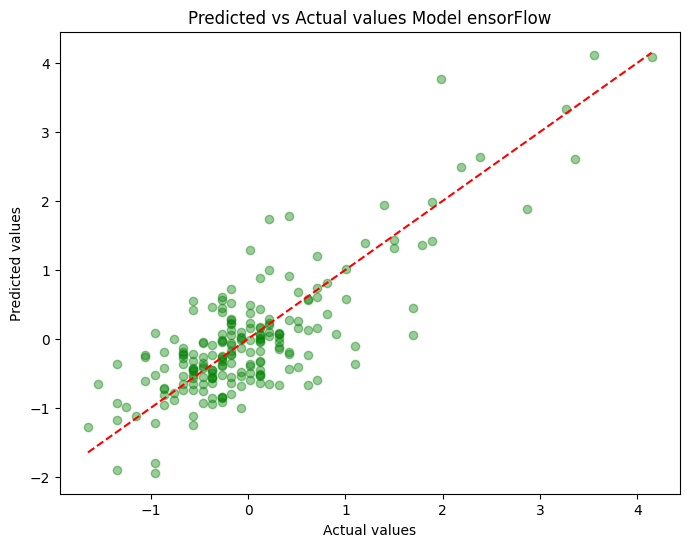

In [23]:
# prompt: seperti sebelumnya tampilkan hasil visualisasi plot antara data asli dengan data prediksi

y_pred_tf_np = y_pred_tf.flatten()
y_test_np_tf = y_test.flatten()

plt.figure(figsize=(8, 6))
plt.scatter(y_test_np_tf, y_pred_tf_np, color='green', alpha=0.4)
plt.plot([y_test_np_tf.min(), y_test_np_tf.max()], [y_test_np_tf.min(), y_test_np_tf.max()], color='red', linestyle='--')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Predicted vs Actual values Model ensorFlow')
plt.show()
